In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Madedata1.csv')

In [3]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [5]:
pd.value_counts(df['Infected'])

1    1260
0    1239
Name: Infected, dtype: int64

In [9]:
infected_df = df[df['Infected'] == 1]

In [11]:
infected_df['Gender'].value_counts()

Female    668
Male      592
Name: Gender, dtype: int64

In [14]:
import seaborn as sns

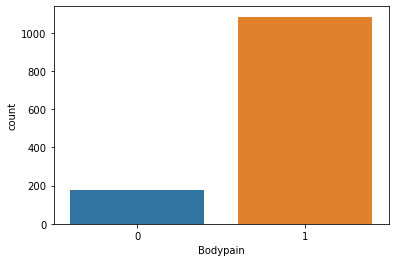

In [19]:
sns.countplot(x=infected_df['Bodypain'], data=infected_df)
plt.show()

In [21]:
infected_df['Bodypain'].value_counts()/len(infected_df)

1    0.861111
0    0.138889
Name: Bodypain, dtype: float64

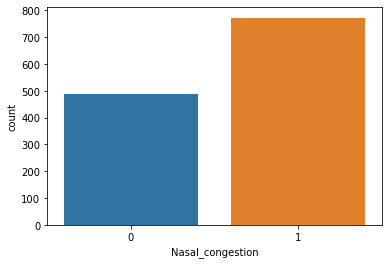

In [22]:
sns.countplot(x=infected_df['Nasal_congestion'], data=infected_df)
plt.show()

In [23]:
infected_df['Nasal_congestion'].value_counts()/len(infected_df)

1    0.612698
0    0.387302
Name: Nasal_congestion, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [28]:
infected_df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1
5,Spain,45,Female,99,1,0,0,0,1,Mild,Not known,1
7,UAE,37,Male,99,0,0,1,1,1,Moderate,Not known,1


In [30]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [31]:
pd.value_counts(X['Gender'])

Male           1257
Female         1208
Transgender      34
Name: Gender, dtype: int64

In [32]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])

In [33]:
X['Gender'].value_counts()

1    1257
0    1208
2      34
Name: Gender, dtype: int64

In [37]:
gender = X['Gender'].values

In [40]:
onehot = OneHotEncoder()
onehot.fit_transform(gender.reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [41]:
X = X.drop(columns=['Gender','Severity','Contact_with_covid_patient'])

In [42]:
X.head()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat
0,10,102,1,0,0,0,1
1,20,103,1,1,0,0,0
2,55,99,0,0,0,1,1
3,37,100,0,1,1,0,0
4,45,101,1,1,1,1,0


In [43]:
# Normalization
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [44]:
X[:5]

array([[0.        , 0.66666667, 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.12658228, 0.83333333, 1.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.56962025, 0.16666667, 0.        , 0.        , 0.        ,
        1.        , 1.        ],
       [0.34177215, 0.33333333, 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.44303797, 0.5       , 1.        , 1.        , 1.        ,
        1.        , 0.        ]])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [46]:
X.shape

(2499, 7)

In [47]:
x_train.shape

(1874, 7)

In [48]:
x_test.shape

(625, 7)